In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
n=14
m=3

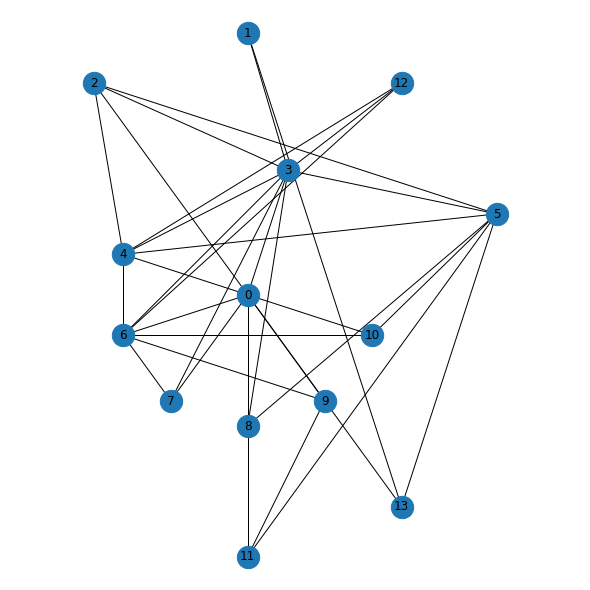

In [35]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.BA_interaction(n,m)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [36]:
model_ = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(model_, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -1.85e-06 M: -4.39e-18 S: 0.693
beta: 0.1, Fe: -7.028 Energy: -0.198 M: -2.08e-17 S: 0.683
beta: 0.2, Fe: -3.668 Energy: -0.422 M: -1.24e-17 S: 0.649
beta: 0.3, Fe: -2.624 Energy: -0.65 M: -6.15e-18 S: 0.592
beta: 0.4, Fe: -2.156 Energy: -0.847 M: 2.69e-18 S: 0.524
beta: 0.5, Fe: -1.910 Energy: -0.992 M: 1.11e-17 S: 0.459
beta: 0.6, Fe: -1.766 Energy: -1.09 M: 2.2e-18 S: 0.406.7
beta: 0.7, Fe: -1.674 Energy: -1.15 M: 2.07e-18 S: 0.3644
beta: 0.8, Fe: -1.612 Energy: -1.2 M: -3.16e-18 S: 0.3316
beta: 0.9, Fe: -1.568 Energy: -1.23 M: 1.39e-18 S: 0.3059
beta: 1.0, Fe: -1.535 Energy: -1.25 M: 1.18e-17 S: 0.2835
beta: 1.1, Fe: -1.510 Energy: -1.27 M: -9.96e-20 S: 0.264
beta: 1.2, Fe: -1.491 Energy: -1.28 M: 2.01e-18 S: 0.2489
beta: 1.3, Fe: -1.475 Energy: -1.3 M: -1.35e-17 S: 0.2347
beta: 1.4, Fe: -1.463 Energy: -1.3 M: -1.98e-17 S: 0.2215
beta: 1.5, Fe: -1.452 Energy: -1.31 M: 2.59e-18 S: 0.2093
beta: 1.6, Fe: -1.444 Energy: -1.32 M: -1.46e-19 S: 0.199
bet

In [37]:
res_nn = solvers.nn_sol(model_, 
                betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.174 std_fe: 5.12E-02 M: -0.002 S: 0.693 E: 0.0010.00829417139
fe: -7.028 std_fe: 3.71E-02 M: 0.002 S: 0.683 E: -0.196 0.0036714
fe: -3.661 std_fe: 7.31E-02 M: 0.001 S: 0.653 E: -0.395 0.0126386
fe: -2.600 std_fe: 1.04E-01 M: -0.000 S: 0.611 E: -0.5630.0090857
fe: -2.111 std_fe: 1.28E-01 M: -0.000 S: 0.562 E: -0.705-0.000857
fe: -1.842 std_fe: 1.32E-01 M: -0.065 S: 0.505 E: -0.833-0.054347
fe: -1.694 std_fe: 6.19E-02 M: -0.182 S: 0.395 E: -1.036-0.172
fe: -1.607 std_fe: 3.26E-02 M: -0.212 S: 0.331 E: -1.134-0.215
fe: -1.551 std_fe: 1.73E-02 M: -0.229 S: 0.289 E: -1.190-0.229
fe: -1.513 std_fe: 1.32E-02 M: -0.235 S: 0.259 E: -1.225-0.229
fe: -1.486 std_fe: 5.24E-03 M: -0.236 S: 0.235 E: -1.251-0.249
fe: -1.465 std_fe: 3.32E-03 M: -0.238 S: 0.214 E: -1.271-0.239
fe: -1.449 std_fe: 2.88E-03 M: -0.241 S: 0.199 E: -1.283-0.245
fe: -1.437 std_fe: 3.12E-03 M: -0.239 S: 0.185 E: -1.295-0.239
fe: -1.427 std_fe: 1.02E-03 M: -0.240 S: 0.171 E: -1.306-0.239
fe: -1.419 std_fe: 9.31E-04 M

In [38]:
res_nn_z2 = solvers.nn_sol(model_, betas_fast, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False, lr=0.01,)
res_nn_z2["name"]="nn_z2"

fe: -693145.970 std_fe: 7.07E+01 M: 0.001 S: 0.693 E: -0.005: -0.00957996
fe: -7.028 std_fe: 3.63E-03 M: -0.003 S: 0.683 E: -0.194 0.003574
fe: -3.668 std_fe: 6.34E-03 M: 0.002 S: 0.649 E: -0.424: 0.003434
fe: -2.624 std_fe: 8.24E-03 M: 0.001 S: 0.594 E: -0.646: -0.00814
fe: -2.156 std_fe: 8.81E-03 M: 0.001 S: 0.524 E: -0.845: 0.009861
fe: -1.910 std_fe: 7.88E-03 M: -0.002 S: 0.458 E: -0.993 -0.00414
fe: -1.766 std_fe: 6.85E-03 M: -0.004 S: 0.406 E: -1.089 -0.00314
fe: -1.674 std_fe: 5.15E-03 M: 0.001 S: 0.365 E: -1.153: -0.01331
fe: -1.612 std_fe: 3.98E-03 M: 0.002 S: 0.330 E: -1.200: -0.01176
fe: -1.568 std_fe: 3.05E-03 M: 0.005 S: 0.305 E: -1.229: -0.00843
fe: -1.535 std_fe: 2.71E-03 M: 0.001 S: 0.283 E: -1.252: -0.000429
fe: -1.510 std_fe: 2.24E-03 M: -0.004 S: 0.263 E: -1.271 0.004149
fe: -1.491 std_fe: 1.47E-03 M: 0.000 S: 0.249 E: -1.283: 0.015666
fe: -1.475 std_fe: 1.62E-03 M: -0.000 S: 0.233 E: -1.2960.0107613
fe: -1.463 std_fe: 1.21E-03 M: -0.001 S: 0.219 E: -1.3060.0077137
f

In [39]:
res_bp = solvers.bp_sol(model_, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -7.023, ener: -0.183, M: -0.000, iter 8
fe: -3.647, ener: -0.357, M: 0.000, iter 13
fe: -2.578, ener: -0.516, M: -0.000, iter 21
fe: -2.080, ener: -0.657, M: 0.000, iter 109
fe: -1.822, ener: -0.927, M: -0.159, iter 37
fe: -1.686, ener: -1.072, M: -0.201, iter 11
fe: -1.604, ener: -1.148, M: -0.219, iter 10
fe: -1.550, ener: -1.195, M: -0.229, iter 8
fe: -1.513, ener: -1.228, M: -0.235, iter 8
fe: -1.486, ener: -1.251, M: -0.238, iter 7
fe: -1.465, ener: -1.269, M: -0.240, iter 7
fe: -1.449, ener: -1.284, M: -0.240, iter 6
fe: -1.437, ener: -1.295, M: -0.240, iter 6
fe: -1.427, ener: -1.305, M: -0.240, iter 6
fe: -1.419, ener: -1.313, M: -0.239, iter 6
fe: -1.413, ener: -1.320, M: -0.238, iter 6
fe: -1.408, ener: -1.325, M: -0.237, iter 6
fe: -1.403, ener: -1.330, M: -0.236, iter 6
fe: -1.399, ener: -1.334, M: -0.235, iter 6
fe: -1.396, ener: -1.338, M: -0.234, iter 6


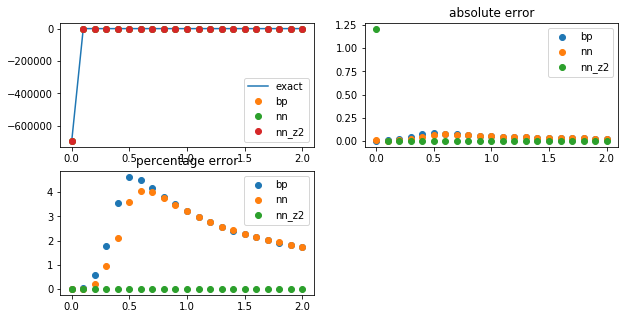

In [43]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
#plt.ylim(-0.1,0.2)
plt.show()

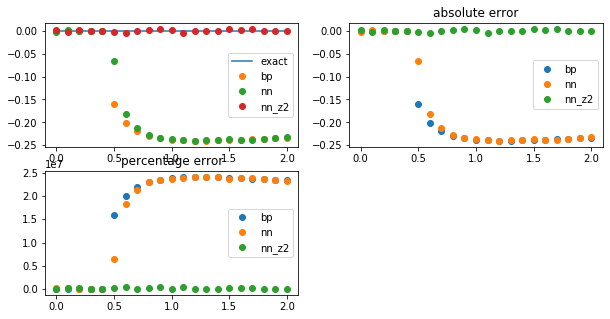

In [41]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

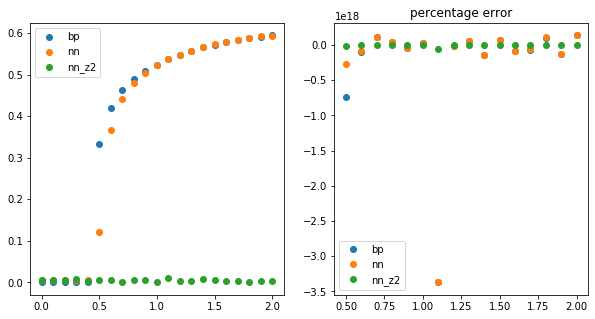

In [42]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

# With random field

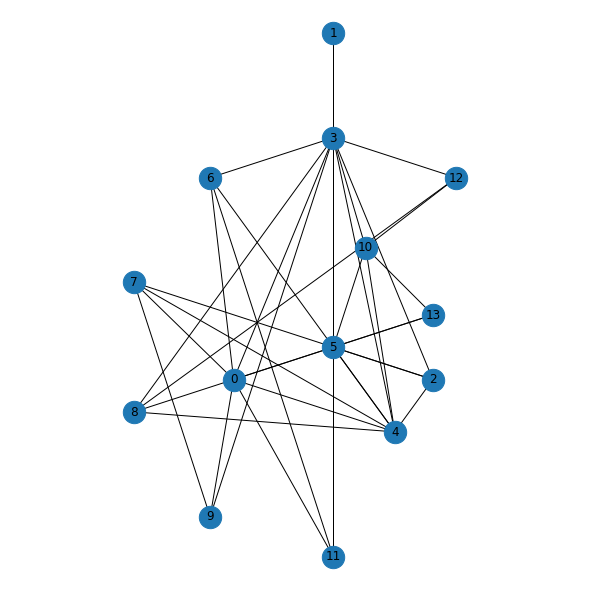

In [12]:

import graph_gen
imp.reload(graph_gen)

N, J_interaction = graph_gen.BA_interaction(n,m)

H_intes = 5
H = 2. * H_intes * np.random.random(N)-H_intes

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [13]:
model_ = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(model_, betas_fast)

res_nn = solvers.nn_sol(model_, 
                betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"



beta: 0.0, Fe: -693147.181 Energy: -1.13e-05 M: 7.35e-07 S: 0.693
beta: 0.1, Fe: -7.452 Energy: -0.99 M: 0.0568 S: 0.64604e+022
beta: 0.2, Fe: -4.403 Energy: -1.67 M: 0.0789 S: 0.547.65
beta: 0.3, Fe: -3.565 Energy: -2.08 M: 0.0779 S: 0.447.99
beta: 0.4, Fe: -3.224 Energy: -2.3 M: 0.0663 S: 0.3685.10
beta: 0.5, Fe: -3.054 Energy: -2.43 M: 0.0516 S: 0.311.88
beta: 0.6, Fe: -2.957 Energy: -2.51 M: 0.0374 S: 0.271.44
beta: 0.7, Fe: -2.896 Energy: -2.55 M: 0.0249 S: 0.240.55
beta: 0.8, Fe: -2.855 Energy: -2.59 M: 0.0143 S: 0.216.00
beta: 0.9, Fe: -2.827 Energy: -2.61 M: 0.00538 S: 0.19766
beta: 1.0, Fe: -2.806 Energy: -2.63 M: -0.00207 S: 0.1813
beta: 1.1, Fe: -2.790 Energy: -2.64 M: -0.00832 S: 0.1661
beta: 1.2, Fe: -2.778 Energy: -2.65 M: -0.0136 S: 0.15499
beta: 1.3, Fe: -2.768 Energy: -2.66 M: -0.0181 S: 0.14388
beta: 1.4, Fe: -2.761 Energy: -2.67 M: -0.0219 S: 0.13377
beta: 1.5, Fe: -2.755 Energy: -2.67 M: -0.0251 S: 0.12466
beta: 1.6, Fe: -2.750 Energy: -2.68 M: -0.0278 S: 0.11655
be

In [14]:
res_bp = solvers.bp_sol(model_, betas_fast)
res_bp ["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -7.453, ener: -0.994, M: 0.057, iter 7
fe: -4.408, ener: -1.680, M: 0.080, iter 9
fe: -3.573, ener: -2.086, M: 0.082, iter 13
fe: -3.232, ener: -2.307, M: 0.073, iter 13
fe: -3.060, ener: -2.430, M: 0.060, iter 13
fe: -2.962, ener: -2.503, M: 0.047, iter 12
fe: -2.900, ener: -2.550, M: 0.034, iter 13
fe: -2.858, ener: -2.582, M: 0.022, iter 11
fe: -2.829, ener: -2.605, M: 0.012, iter 12
fe: -2.807, ener: -2.622, M: 0.004, iter 11
fe: -2.791, ener: -2.636, M: -0.004, iter 11
fe: -2.779, ener: -2.647, M: -0.010, iter 12
fe: -2.769, ener: -2.657, M: -0.015, iter 14
fe: -2.761, ener: -2.664, M: -0.020, iter 12
fe: -2.755, ener: -2.671, M: -0.023, iter 12
fe: -2.750, ener: -2.676, M: -0.026, iter 14
fe: -2.746, ener: -2.681, M: -0.029, iter 13
fe: -2.742, ener: -2.685, M: -0.031, iter 13
fe: -2.739, ener: -2.688, M: -0.033, iter 13
fe: -2.737, ener: -2.691, M: -0.034, iter 13


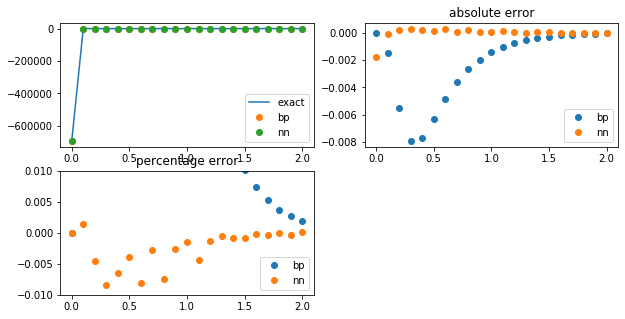

In [15]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn])
plt.ylim(-0.01,0.01)
plt.show()

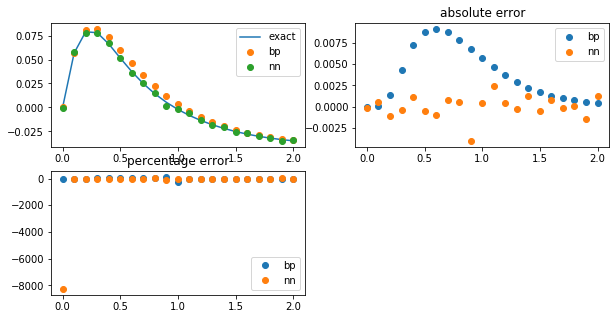

In [16]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn])
plt.show()

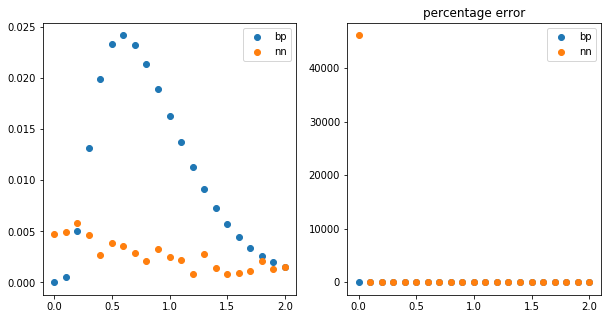

In [17]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn])
plt.legend()
plt.show()

# J +-1

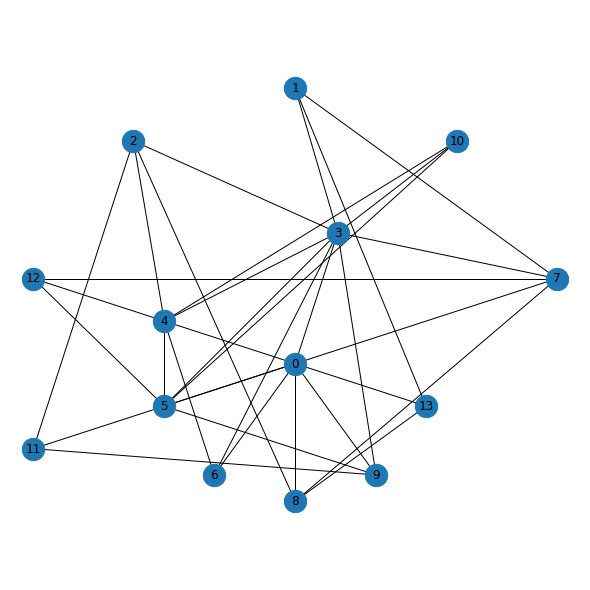

In [18]:
import graph_gen
import imp
imp.reload(graph_gen)
periodic = True
N, J_interaction = graph_gen.BA_interaction(n,m)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass_one()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [19]:
model_j1 = model.model(N, H, J, J_interaction)
res_ex_j1 = solvers.exact_sol(model_j1, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2.36e-06 M: -3.9e-18 S: 0.693
beta: 0.1, Fe: -7.046 Energy: -0.226 M: -1.64e-18 S: 0.682
beta: 0.2, Fe: -3.688 Energy: -0.429 M: -2.03e-18 S: 0.652
beta: 0.3, Fe: -2.631 Energy: -0.603 M: 1.48e-18 S: 0.608
beta: 0.4, Fe: -2.143 Energy: -0.749 M: 1.62e-18 S: 0.558
beta: 0.5, Fe: -1.877 Energy: -0.868 M: -4.18e-19 S: 0.504
beta: 0.6, Fe: -1.717 Energy: -0.965 M: -4.1e-20 S: 0.451
beta: 0.7, Fe: -1.615 Energy: -1.04 M: 1.84e-18 S: 0.466
beta: 0.8, Fe: -1.548 Energy: -1.11 M: -2.45e-18 S: 0.351
beta: 0.9, Fe: -1.502 Energy: -1.16 M: -2.8e-19 S: 0.306
beta: 1.0, Fe: -1.471 Energy: -1.2 M: 9.68e-19 S: 0.2666
beta: 1.1, Fe: -1.448 Energy: -1.24 M: -4.79e-19 S: 0.231
beta: 1.2, Fe: -1.432 Energy: -1.26 M: -2.62e-19 S: 0.201
beta: 1.3, Fe: -1.420 Energy: -1.28 M: -1.88e-18 S: 0.175
beta: 1.4, Fe: -1.410 Energy: -1.3 M: -1.1e-18 S: 0.1547
beta: 1.5, Fe: -1.404 Energy: -1.31 M: 1.07e-18 S: 0.137
beta: 1.6, Fe: -1.398 Energy: -1.32 M: -7.39e-20 S: 0.122
beta: 1.

In [20]:
res_nn_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=500, 
                        bias = True, 
                        lr=0.01,
                        batch_size=1000,
                        z2 = False, x_hat_clip = False, stats=10)
res_nn_j1["name"]="nn"

res_nn_z2_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2_j1["name"]="nn_z2"

fe: -693147.148 std_fe: 5.71E-02 M: 0.014 S: 0.693 E: 0.157 0.0075717363
fe: -7.041 std_fe: 2.44E-02 M: -0.071 S: 0.700 E: -0.043-0.001716
fe: -3.691 std_fe: 5.43E-02 M: 0.000 S: 0.652 E: -0.429 0.0038691
fe: -2.611 std_fe: 4.45E-02 M: 0.071 S: 0.603 E: -0.600 -0.004140
fe: -2.159 std_fe: 6.45E-02 M: -0.071 S: 0.527 E: -0.843-0.001863
fe: -1.811 std_fe: 8.42E-02 M: -0.100 S: 0.505 E: -0.800-0.008291
fe: -1.687 std_fe: 1.08E-01 M: -0.000 S: 0.541 E: -0.7860.0005719
fe: -1.577 std_fe: 9.19E-02 M: -0.071 S: 0.574 E: -0.757-0.006866
fe: -1.478 std_fe: 1.26E-01 M: -0.000 S: 0.451 E: -0.9140.0025710
fe: -1.452 std_fe: 1.11E-01 M: -0.014 S: 0.343 E: -1.071-0.003299
fe: -1.432 std_fe: 1.28E-02 M: 0.014 S: 0.203 E: -1.229 0.0017193
fe: -1.417 std_fe: 6.30E-02 M: 0.071 S: 0.223 E: -1.214 0.0061491
fe: -1.390 std_fe: 4.13E-03 M: 0.014 S: 0.108 E: -1.300 0.0007141
fe: -1.379 std_fe: 2.86E-03 M: -0.029 S: 0.122 E: -1.2860.0024394
fe: -1.375 std_fe: 6.11E-04 M: 0.014 S: 0.085 E: -1.314 0.0034313
fe:

In [21]:
imp.reload(solvers)
import bp_solver
imp.reload(bp_solver)
res_bp_j1 = solvers.bp_sol(model_j1, betas_fast, error=1e-4, )
res_bp_j1["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 2
fe: -7.049, ener: -0.235, M: -0.000, iter 6
fe: -3.700, ener: -0.465, M: -0.000, iter 8
fe: -2.659, ener: -0.687, M: 0.000, iter 14
fe: -2.192, ener: -0.896, M: 0.000, iter 30
fe: -1.952, ener: -1.086, M: 0.029, iter 1000
fe: -1.845, ener: -1.265, M: 0.193, iter 1000
fe: -1.773, ener: -1.363, M: -0.230, iter 1000
fe: -1.465, ener: -1.165, M: -0.011, iter 1000
fe: -1.794, ener: -1.575, M: -0.177, iter 1000
fe: -1.687, ener: -1.528, M: -0.288, iter 1000
fe: -1.866, ener: -1.679, M: -0.023, iter 1000
fe: -1.587, ener: -1.543, M: 0.180, iter 1000
fe: -1.968, ener: -1.690, M: 0.049, iter 1000
fe: -2.007, ener: -1.839, M: 0.026, iter 1000
fe: -1.748, ener: -1.542, M: -0.032, iter 1000
fe: -1.502, ener: -1.623, M: -0.281, iter 1000
fe: -1.922, ener: -1.710, M: -0.199, iter 1000
fe: -1.973, ener: -1.767, M: -0.163, iter 1000
fe: -1.538, ener: -1.472, M: -0.431, iter 1000
fe: -1.309, ener: -1.269, M: -0.299, iter 1000


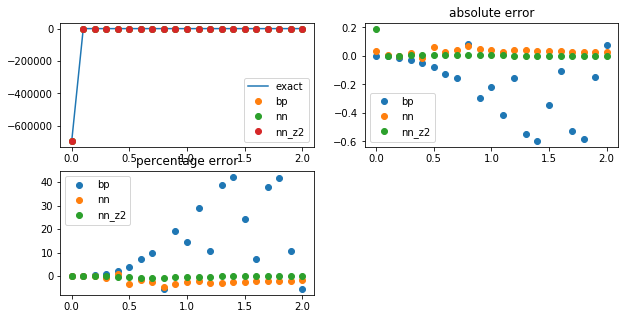

In [22]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

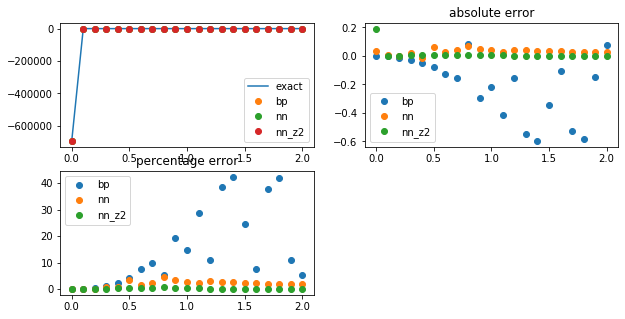

In [27]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

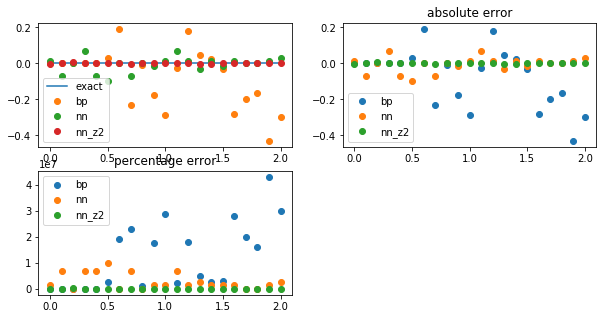

In [28]:
%matplotlib inline
label="M"
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
#plt.ylim(-0.01,0.01)
plt.show()

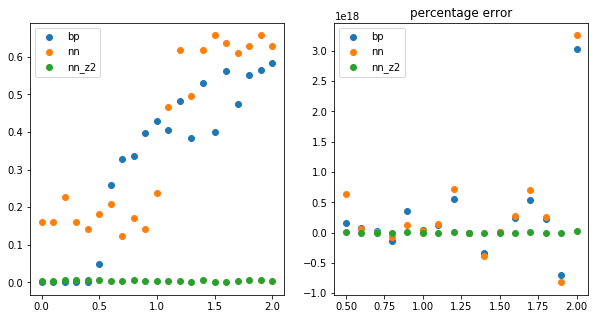

In [25]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_j1, [res_bp_j1, res_nn_j1, res_nn_z2_j1])
plt.legend()
plt.show()